In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/GiveMeSomeCredit'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df_train = pd.read_csv("GiveMeSomeCredit/cs-training.csv")
df_test = pd.read_csv("GiveMeSomeCredit/cs-test.csv")
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
#get summary statistics of the data
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Default Rate: 0.06684


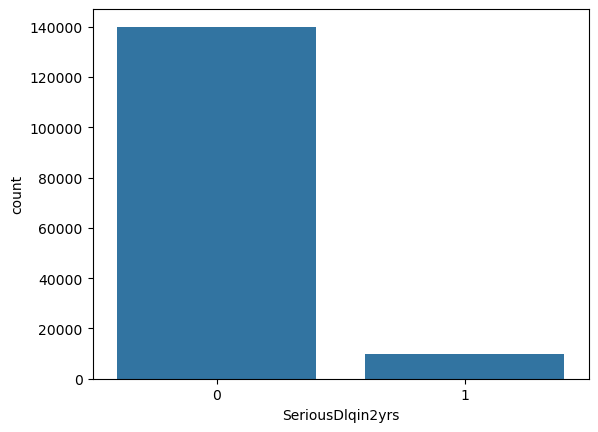

In [18]:
sns.countplot(x="SeriousDlqin2yrs", data = df_train)
print("Default Rate: {}".format(df_train["SeriousDlqin2yrs"].sum()/len(df_train)))

In [20]:
# check if there are null values in dataset
null_val_sums = df_train.isnull().sum()
pd.DataFrame({"Column":null_val_sums.index,"Number of Null Values": null_val_sums.values, "Proportion":null_val_sums.values / len(df_train)})

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


In [24]:
df_train["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [26]:
default_prop = []
for i in range(int(df_train["RevolvingUtilizationOfUnsecuredLines"].max())):
        temp_ = df_train.loc[df_train["RevolvingUtilizationOfUnsecuredLines"] >= i]
        default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])
default_prop

[[0, 0.06684],
 [1, 0.37177950868783705],
 [2, 0.14555256064690028],
 [3, 0.09931506849315068],
 [4, 0.08679245283018867],
 [5, 0.07874015748031496],
 [6, 0.07692307692307693],
 [7, 0.0778688524590164],
 [8, 0.07407407407407407],
 [9, 0.07053941908713693],
 [10, 0.07053941908713693],
 [11, 0.07053941908713693],
 [12, 0.06666666666666667],
 [13, 0.058823529411764705],
 [14, 0.058823529411764705],
 [15, 0.05531914893617021],
 [16, 0.05531914893617021],
 [17, 0.05531914893617021],
 [18, 0.05531914893617021],
 [19, 0.05555555555555555],
 [20, 0.05555555555555555],
 [21, 0.05555555555555555],
 [22, 0.05555555555555555],
 [23, 0.05555555555555555],
 [24, 0.05555555555555555],
 [25, 0.05555555555555555],
 [26, 0.05555555555555555],
 [27, 0.05555555555555555],
 [28, 0.05555555555555555],
 [29, 0.05555555555555555],
 [30, 0.05150214592274678],
 [31, 0.05150214592274678],
 [32, 0.05150214592274678],
 [33, 0.05150214592274678],
 [34, 0.05150214592274678],
 [35, 0.05150214592274678],
 [36, 0.05150

Text(0.5, 1.0, 'Proportion of Defaulters As Minimum RUUL Increases')

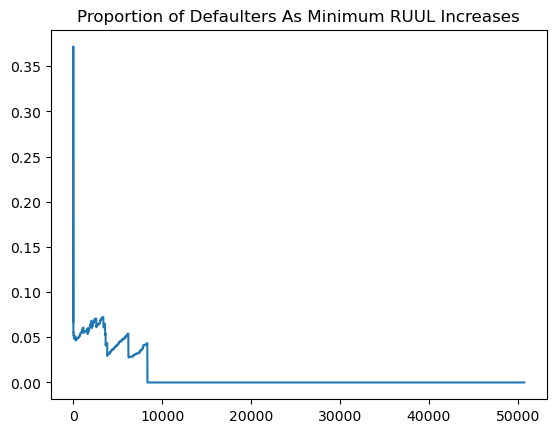

In [28]:
sns.lineplot(x=[i[0] for i in default_prop], y = [i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum RUUL Increases")

In [30]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: {}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] <= 1)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: 0.05991996127598361


In [32]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:\n{}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] < 13)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:
0.06685273968029273


In [38]:
df_train["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\720596002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["age"])


<Axes: xlabel='age', ylabel='Density'>

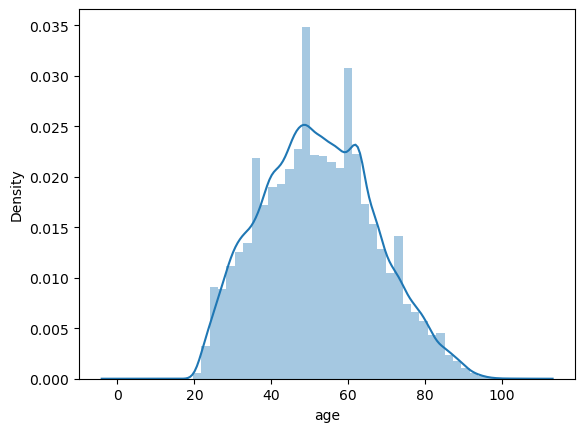

In [40]:
sns.distplot(df_train["age"])

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\3759616966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])


<Axes: xlabel='age', ylabel='Density'>

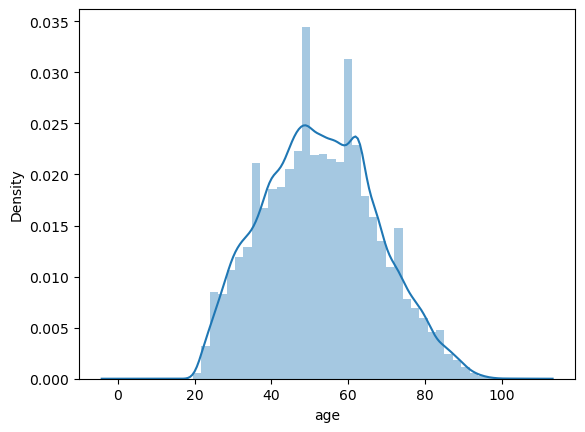

In [42]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\1734841089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])


<Axes: xlabel='age', ylabel='Density'>

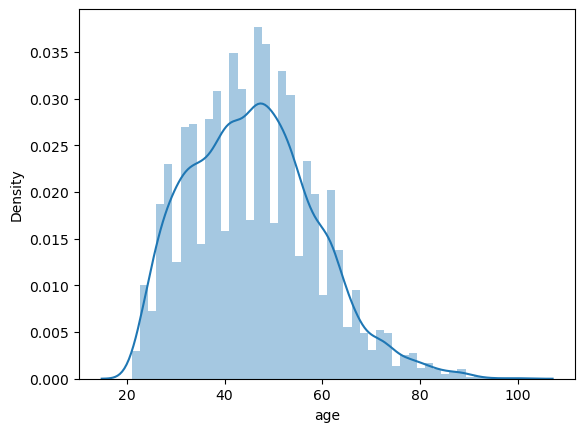

In [44]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])

In [46]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTime30-59DaysPastDueNotWorse"]
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: count, dtype: int64

In [48]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: count, dtype: int64

In [50]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: count, dtype: int64

In [52]:
df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


In [54]:
distinct_triples_counts = dict()
for arr in df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple = ",".join(list(map(str, arr)))
    if triple not in distinct_triples_counts:
        distinct_triples_counts[triple] = 0
    else:
        distinct_triples_counts[triple] += 1
distinct_triples_counts

{'98,98,98': 263, '96,96,96': 4}

In [56]:
df_train["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [58]:
df_train["DebtRatio"].quantile(0.95)

2449.0

In [60]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,7494.000000,379.000000,7494.000000
mean,4417.958367,0.084433,0.055111
std,7875.314649,0.278403,0.228212
min,2450.000000,0.000000,0.000000
25%,2893.250000,0.000000,0.000000
50%,3491.000000,0.000000,0.000000
75%,4620.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [62]:
len(df_train[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)) & (df_train['SeriousDlqin2yrs'] == df_train['MonthlyIncome'])])

331

In [64]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)]["MonthlyIncome"].value_counts()

MonthlyIncome
0.0    347
1.0     32
Name: count, dtype: int64

In [66]:
print("Number of people who owe around 2449 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(df_train.loc[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)) & (df_train["MonthlyIncome"] == df_train["SeriousDlqin2yrs"])])))

Number of people who owe around 2449 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 331


In [68]:
df_train["DebtRatio"].quantile(0.975)

3489.024999999994

In [70]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,185.000000,3750.000000
mean,5917.488000,0.064865,0.064267
std,10925.524011,0.246956,0.245260
min,3490.000000,0.000000,0.000000
25%,3957.250000,0.000000,0.000000
50%,4619.000000,0.000000,0.000000
75%,5789.500000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [72]:
len(df_train[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)) & (df_train['SeriousDlqin2yrs'] == df_train['MonthlyIncome'])])

164

In [74]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)]["MonthlyIncome"].value_counts()

MonthlyIncome
0.0    173
1.0     12
Name: count, dtype: int64

In [76]:
print("Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(df_train.loc[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)) & (df_train["MonthlyIncome"] == df_train["SeriousDlqin2yrs"])])))

Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 164


C:\Users\happy\AppData\Local\Temp\ipykernel_35896\2163482783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["MonthlyIncome"].dropna())


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

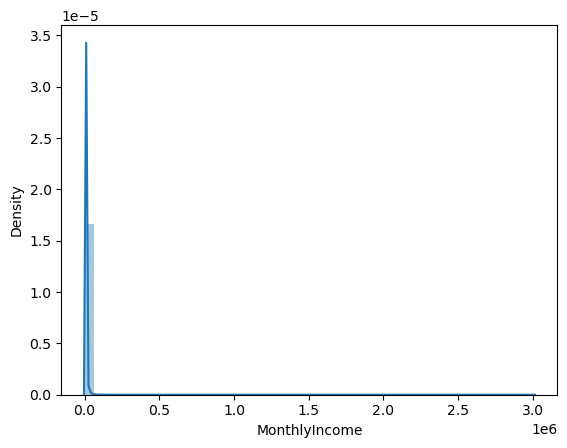

In [78]:
sns.distplot(df_train["MonthlyIncome"].dropna())

In [80]:
df_train["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\4198650780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train["DebtRatio"] <= df_train["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna())


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

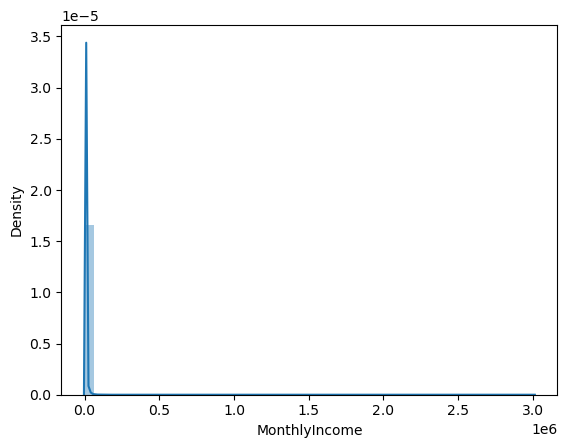

In [82]:
sns.distplot(df_train.loc[df_train["DebtRatio"] <= df_train["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna())

In [84]:
df_train["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\431948593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["NumberOfOpenCreditLinesAndLoans"])


<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

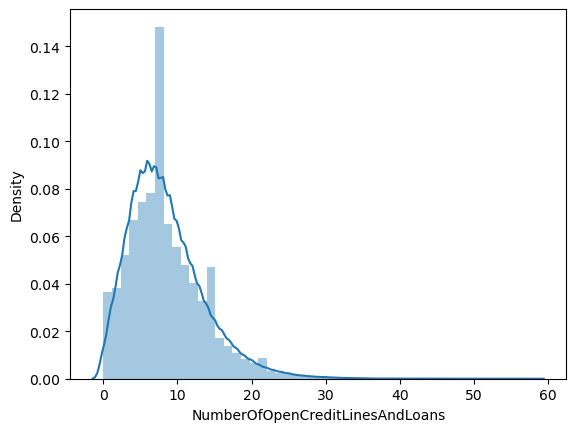

In [86]:
sns.distplot(df_train["NumberOfOpenCreditLinesAndLoans"])

In [88]:
df_train["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

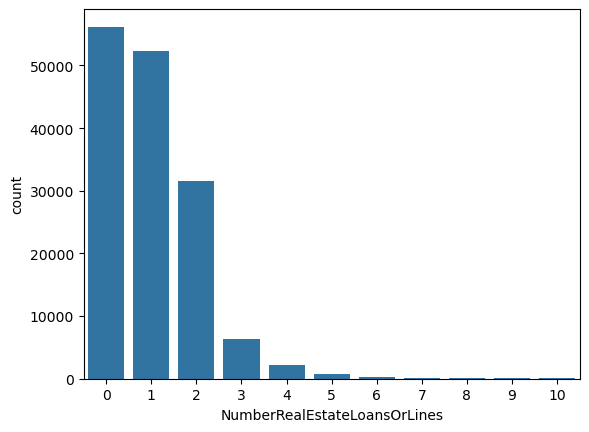

In [90]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df_train.loc[df_train["NumberRealEstateLoansOrLines"] <= 10])

In [92]:
df_train.loc[df_train["NumberRealEstateLoansOrLines"] > 13]["SeriousDlqin2yrs"].describe()

count    38.000000
mean      0.210526
std       0.413155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [94]:
df_train["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [96]:
df_train["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [98]:
df_train.loc[df_train["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

<Axes: xlabel='NumberOfDependents', ylabel='count'>

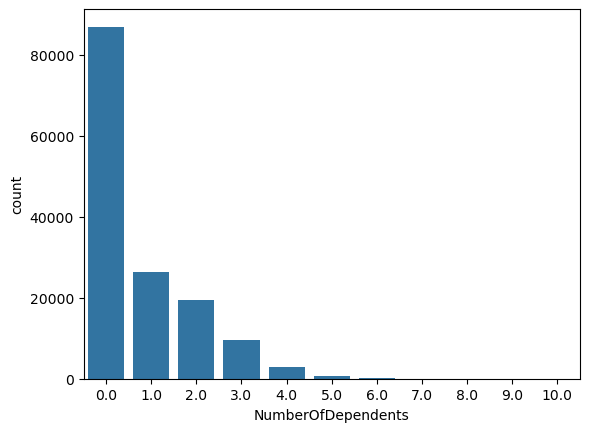

In [100]:
sns.countplot(x="NumberOfDependents", data=df_train.loc[df_train["NumberOfDependents"] <= 10])

In [102]:
df_train = df_train.fillna(df_train.median())
print(df_train.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [104]:
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=age_bins).astype(str)
dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependent_bin).astype(str)
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)


df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop').astype(str)
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop').astype(str)
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop').astype(str)

In [106]:
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]

In [108]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
    data['IV'] = (data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [110]:
for f in bin_cols:
    print(f)
    print(cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age
0.24041120302785982
bin_NumberOfDependents
0.01450836007644442
bin_NumberOfTimes90DaysLate
0.49160685733515563
bin_NumberOfTime30-59DaysPastDueNotWorse
0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse
0.2665587583516951
bin_RevolvingUtilizationOfUnsecuredLines
1.0596188771423887
bin_DebtRatio
0.05948761145809681
bin_MonthlyIncome
0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans
0.04802315528985505
bin_NumberRealEstateLoansOrLines
0.0120914141106244


In [112]:
def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        
        df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new
        


In [114]:
# 我们根据IV选出来的特征
feature_cols = ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','age','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']
bin_cols = ['bin_RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_age','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\3784949062.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_woe = df_new.groupby(f).agg({target:['sum','count']})
C:\Users\happy\AppData\Local\Temp\ipykernel_35896\3784949062.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_woe = df_new.groupby(f).agg({target:['sum','count']})
C:\Users\happy\AppData\Local\Temp\ipykernel_35896\3784949062.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
0,1.242254,1.616726,0.228343,-0.176674,-0.09799
1,1.242254,-0.257826,0.469547,-0.176674,-0.09799
2,0.053164,-0.257826,0.469547,-0.176674,-0.09799
3,-0.866502,-0.257826,0.469547,-0.176674,-0.09799
4,1.242254,-0.257826,0.228343,-0.176674,-0.09799
...,...,...,...,...,...
149995,-1.447382,-0.257826,-1.132145,-0.176674,-0.09799
149996,0.053164,-0.257826,0.228343,-0.176674,-0.09799
149997,-0.866502,-0.257826,-0.084782,-0.176674,-0.09799
149998,-1.286617,-0.257826,0.469547,-0.176674,-0.09799


In [ ]:
# df2 = df_woe[['woe_bin_age','bin_age']].drop_duplicates()
# df2.head(10)

In [116]:
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df=df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\859226669.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_bin_to_woe = pd.concat([df_bin_to_woe,df])


,features,bin,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",1.242254
2,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",0.053164
3,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",-0.866502
11,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",-1.286617
14,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",-1.447382
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.616726
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-0.257826
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.027495
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.336869
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.436786


In [118]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=42)

In [120]:
print('bad rate is: ',y_train.mean())

bad rate is:  0.06725


In [122]:
X_train.describe()

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,-0.460494,-0.143652,-0.112757,-0.114278,-0.062802
std,0.998029,0.487847,0.539645,0.432243,0.315584
min,-1.447382,-0.257826,-1.132145,-0.176674,-0.097990
25%,-1.286617,-0.257826,-0.689003,-0.176674,-0.097990
50%,-0.866502,-0.257826,-0.084782,-0.176674,-0.097990
75%,0.053164,-0.257826,0.228343,-0.176674,-0.097990
max,1.242254,2.846431,0.562024,4.124352,3.734887


In [124]:
model = LogisticRegression(random_state=42).fit(X_train,y_train)

In [126]:
#在验证集上看性能
model.score(X_test,y_test)

0.9370333333333334

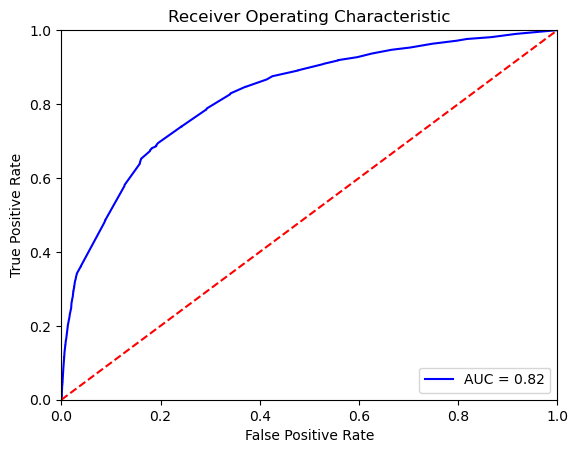

In [128]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
#混淆矩阵
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[27888,   156],
       [ 1733,   223]], dtype=int64)

In [132]:
model.coef_

array([[0.76552759, 0.59872503, 0.48500324, 0.57441442, 0.32091396]])

In [134]:
A = 650
B =72.13

In [136]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data
    

In [138]:
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",-69
1,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",-3
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",48
3,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",71
4,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",80
5,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-70
6,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",11
7,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-88
8,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-101
9,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-105


In [140]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

C:\Users\happy\AppData\Local\Temp\ipykernel_35896\497118922.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))


Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 6   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 31  NumberOfTime60-89DaysPastDueNotWorse   
                                     32  NumberOfTime60-89DaysPastDueNotWorse   
                                     39  NumberOfTime60-89DaysPastDueNotWorse   
                                     40  NumberOfTime60-89DaysPastDueNotWorse   
                                     35  NumberOfTime60-89DaysPastDueNotWorse   
                                     38  NumberOfTime60-89DaysPastDueNotWorse   
                                     34  NumberOfTime60-89DaysPastDueNotWorse   
                                     33  NumberOfTime60-89DaysPastDueNotWorse   
                                     36  NumberOfTime60-89DaysPastDueNotWorse   
                                     37  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              21               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 4   RevolvingUtilizationOfUnsecuredLines   
                                     3   RevolvingUtilizationOfUnsecuredLines   
                                     2   RevolvingUtilizationOfUnsecuredLines   
                                     1   RevolvingUtilizationOfUnsecuredLines   
                                     0   RevolvingUtilizationOfUnsecuredLines   
age                                  17                                   age   
                                     19                                   age   
                                     18                                   age   
                                     15                                   age   
                                     16                                   age   
                                     20                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 6        (-inf, 1.0]     11  
                                     5         (1.0, 2.0]    -70  
                                     13        (7.0, 8.0]    -81  
                                     14        (8.0, 9.0]    -84  
                                     7         (2.0, 3.0]    -88  
                                     8         (3.0, 4.0]   -101  
                                     9         (4

In [142]:
# 本段代码的目的是把输入数据映射到分箱，并且选取相应的分值来计算最后的信用评分
def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s=='inf':
        return 999999999.0
    else:
        return float(s)
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += selected_record_in_scorecard['Score'].iloc[0]
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df
        
        


In [144]:
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5, random_state=1)
good_sample = good_sample[feature_cols]
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5, random_state=1)
bad_sample = bad_sample[feature_cols]

In [146]:
calculate_score_with_card(good_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
149862,0.000000,0,55,0,0,744
43190,0.003769,0,39,0,0,725
90275,0.000000,0,78,0,0,781
6741,0.013976,0,57,0,0,744
140108,0.089350,0,39,0,0,702


In [148]:
calculate_score_with_card(bad_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
86741,1.000000,0,49,0,0,593
137326,0.612609,2,53,0,0,589
79696,0.608164,5,56,1,0,554
87970,0.964554,1,30,0,1,585
120547,0.940120,0,38,1,1,585
